In [1]:
import torch
import skimage
import matplotlib.pyplot as plt
import os
from torchvision import models

In [2]:
import pandas as pd
from tqdm import tqdm

In [3]:
# from core.CNN_scorers import TorchScorer
from core.insilico_exps import resize_and_pad_tsr
from transformers.tf_exp import TransformerScorer, ImageLoader

In [4]:
# class ImageLoader(object):
#     def __init__(self, datapath) -> None:
#         self.datapath = datapath
#         self._flies_df = pd.DataFrame(columns=['File', 'Shape'])
#         self._num_imgs = 0
#         self.imgs = torch.Tensor([])
    
#     @staticmethod
#     def preprocess(img):
#         img_tensor = torch.Tensor(img).permute((2, 0, 1)).unsqueeze(dim=0)
#         img_new = resize_and_pad_tsr(img_tensor, (224, 224), (0, 0))
#         return img_new

#     def load(self):
#         list_of_files = []
#         for root, dirs, files in os.walk(self.datapath):
#             for file in files:
#                 list_of_files.append(os.path.join(root, file))
#         for name in tqdm(list_of_files):
#             img = skimage.io.imread(name)
#             shape_tmp = img.shape
#             dic_tmp = {
#                 'File': [name],
#                 'Shape': [str(shape_tmp)]
#             }
#             df_tmp = pd.DataFrame(data=dic_tmp)
#             self._flies_df = pd.concat([self._flies_df, df_tmp], axis=0)
#             try:
#                 img_processed = self.preprocess(img.copy())
#             except:
#                 continue
#             self.imgs = torch.concat([self.imgs, img_processed])
#         self._num_imgs = self.imgs.shape[0]
#         return self._num_imgs

#     def get_imgs(self):
#         return self.imgs

In [5]:
# Tench
datapath = '../../Datasets/imagenette2/train/n01440764'

In [5]:
# Golf
data_golf = '../../Datasets/imagenette2/train/n03445777'

In [6]:
imloader = ImageLoader(data_golf)

In [7]:
imloader.load()

100%|██████████| 951/951 [01:46<00:00,  8.95it/s]


927

In [8]:
imgs = imloader.imgs

In [9]:
imgs.shape

torch.Size([927, 3, 224, 224])

In [10]:
model = TransformerScorer(model_name='vit_b_16')

In [11]:
model_unit = ("vit_b_16", ".heads.Linearhead", 574)
model.select_unit(model_unit)

In [12]:
scores = model.score_tsr(imgs / 255.)

In [13]:
scores_golf = pd.DataFrame(data=scores, columns=['nature_score'])

In [14]:
scores_golf.to_csv('results/scores/nature/golf_vit_b_16.csv')

Text(0.5, 0, 'Activation scores')

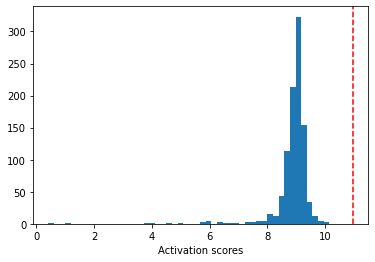

In [14]:
plt.hist(scores, bins=50)
plt.axvline(x=10.96, color='r', linestyle='--')
plt.xlabel('Activation scores')

In [15]:
from skimage import io

In [16]:
img_generated = io.imread('/home/paperspace/mlproj2_new/ActMax-Optimizer-Dev/results/evolutions/vit_b_16/golf_ball/Best_vit_b_16_exp_0.png')

In [17]:
# img_generated = img_generated[:, :, :3]
img_generated.shape

(224, 224, 3)

In [18]:
model_unit = ("vit_b_16", ".heads.Linearhead", 574)
model.select_unit(model_unit)

In [19]:
img_generated = torch.Tensor(img_generated / 225.).permute((2, 0, 1)).unsqueeze(dim=0)

In [20]:
model.score_tsr(img_generated)

array([9.92602825])

Text(0.5, 0, 'Activation scores')

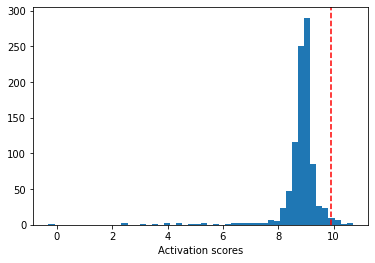

In [21]:
plt.hist(scores, bins=50)
plt.axvline(x=9.92, color='r', linestyle='--')
plt.xlabel('Activation scores')